## Directories

In [80]:
# Input embi
embi_dir = '../data/00-raw/others/EMBI.csv'

# Input Channel
data_dir = '../data/00-raw/youtube/Provincia La Rioja-transcripts.csv'

# Output Dir
output_dir = '../data/01-nlp_processing/'

#File Output
liwc_files_output = output_dir+'youtube/Provincia La Rioja-transcripts liwc.csv'
merged_files_output = output_dir+'youtube/Provincia La Rioja-transcripts merged.csv'

## Variables

In [94]:
timeframe_start = '2018-1-1'
timeframe_end = '2022-12-31'
class_categories = {
    'Liguistic Standard Dimension': ['Funct', 'TotPron', 'PronPer', 'Articulo', 'Verbos', 'VerbAux', 'Prepos', 'Conjunc', 'Negacio', 'Cuantif', 'Numeros', 'Maldec'],
    'Liguistic Subject': ['Yo', 'Nosotro', 'TuUtd', 'ElElla', 'Ellos', 'PronImp'],
    'Linguistic Time': ['Pasado', 'Present', 'Futuro', 'Adverb'],
    'Verb': ['verbYO', 'verbTU', 'verbNOS', 'verbosEL', 'verbELLOS', 'Subjuntiv'],
    'Formality': ['VosUtds', 'formal', 'informal', 'verbVos'],
    'Social': ['Social', 'Familia', 'Amigos', 'Humanos'],
    'Emotion': ['Afect', 'EmoPos', 'EmoNeg', 'Ansiedad', 'Enfado', 'Triste'],
    'Cognitive': ['MecCog', 'Insight', 'Causa', 'Discrep', 'Tentat', 'Certeza', 'Inhib', 'Incl', 'Excl'],
    'Perception': ['Percept', 'Ver', 'Oir', 'Sentir'],
    'Biological': ['Biolog', 'Cuerpo', 'Salud', 'Sexual', 'Ingerir'],
    'Relativity': ['Relativ', 'Movim', 'Espacio', 'Tiempo'],
    'Personal Concerns': ['Trabajo', 'Logro', 'Placer', 'Hogar', 'Dinero', 'Relig', 'Muerte'],
    'Spoken': ['Asentir', 'NoFluen', 'Relleno']
    }

## Imports

##### Packages

In [1]:
!pip install tqdm
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: c:\Users\Pc\.pyenv\pyenv-win\versions\3.9.13\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 6.3 MB/s eta 0:00:02
   - -------------------------------------- 0.4/10.6 MB 6.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.6 MB 6.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 7.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 6.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 7.4 MB/s eta 0:00:02
   --------- ---------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


##### Modules

In [7]:
from utilities.data.standardize_data import *
from utilities.data.filter_date import *
from utilities.nlp.apply_liwc import *
from utilities.nlp.spanish_liwc import *


### Import Data

In [69]:
embi_df = pd.read_csv(embi_dir)
data_df = pd.read_csv(data_dir)

## Adjust Dataframes

In [9]:
with pd.option_context('display.max_rows',10,'display.max_columns',None):
    display(data_df[:10])

,Unnamed: 0,video_id,published_date,channel_name,channel_category,channel_id,is_autogenerated,transcription
0,0,ToQtrN686CQ,2023-11-03,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,[Música] actual quiere ser un mapa quiere ser ...
1,1,WBLkhdlxl-g,2023-11-03,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,presentar el el prio consejo del colegio del c...
2,2,kCO0b12UClI,2023-11-03,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,unos datos y unas estadísticas que señalan que...
3,3,7ITmKn9tIKU,2023-11-02,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,en principio vamos a a disfrutar de cuatro con...
4,4,c_4Oc1ZnX9I,2023-11-02,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,un presupuesto que marca y contempla un increm...
5,5,z0m5mRXI6Cc,2023-11-02,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,tratar de mejorar la Salud Mental y emocional ...
6,6,u6qk3Oyio2U,2023-11-02,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,el sector del champiñón todos sabemos en la se...
7,7,G-yGTci0Ch0,2023-10-31,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,La Rioja es la comunidad Autónoma más pequeña ...
8,8,dKfCa-3Xv2U,2023-10-26,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,quería hacer tres reflexiones en torno al valo...
9,9,7s9emLWHQKs,2023-10-25,Provincia La Rioja,Provincial Government,UCm0tq4vpa3bWZCr5sgiA6rQ,True,el motivo de esta rueda de prensa es anunciar ...


In [10]:
data_df = standardize_data(data_df, text_col='transcription', date_col='published_date', timeframe_start=timeframe_start, timeframe_end=timeframe_end)

## Apply LIWC

In [11]:
liwc_df = data_df.copy()

liwc_df = apply_normalize_liwc(
    liwc_df,
    text_col_name='text',
    date_col_name='date'
    )

In [16]:
liwc_df.to_csv(liwc_files_output, index=False)

## Min-Max Normalization

In [71]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform WordCount from liwc_df
liwc_df['WC'] = scaler.fit_transform(liwc_df[['WC']])

# Preprocess 'EMBI' column in embi_df
embi_df['EMBI'] = embi_df['EMBI'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x).astype(float)

# Fit and transform EMBI from embi_df
embi_df['EMBI'] = scaler.fit_transform(embi_df[['EMBI']])


## Merge and Clean DataFrames

In [75]:
embi_df['date'] = embi_df[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1)

embi_df.drop(['year', 'month', 'day'], axis=1, inplace=True)
embi_df = filter_dates_within_range(embi_df, date_col='date',start_date=timeframe_start, end_date=timeframe_end)
embi_df = embi_df.rename(columns={'EMBI': 'embi'})

In [78]:
merged_df = pd.merge(embi_df, liwc_df, on=['date'], how='inner')
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [81]:
merged_df.to_csv(merged_files_output,index=False)

## Descriptive Analysis



Liguistic Standard Dimension: ['Funct', 'TotPron', 'PronPer', 'Articulo', 'Verbos', 'VerbAux', 'Prepos', 'Conjunc', 'Negacio', 'Cuantif', 'Numeros', 'Maldec']


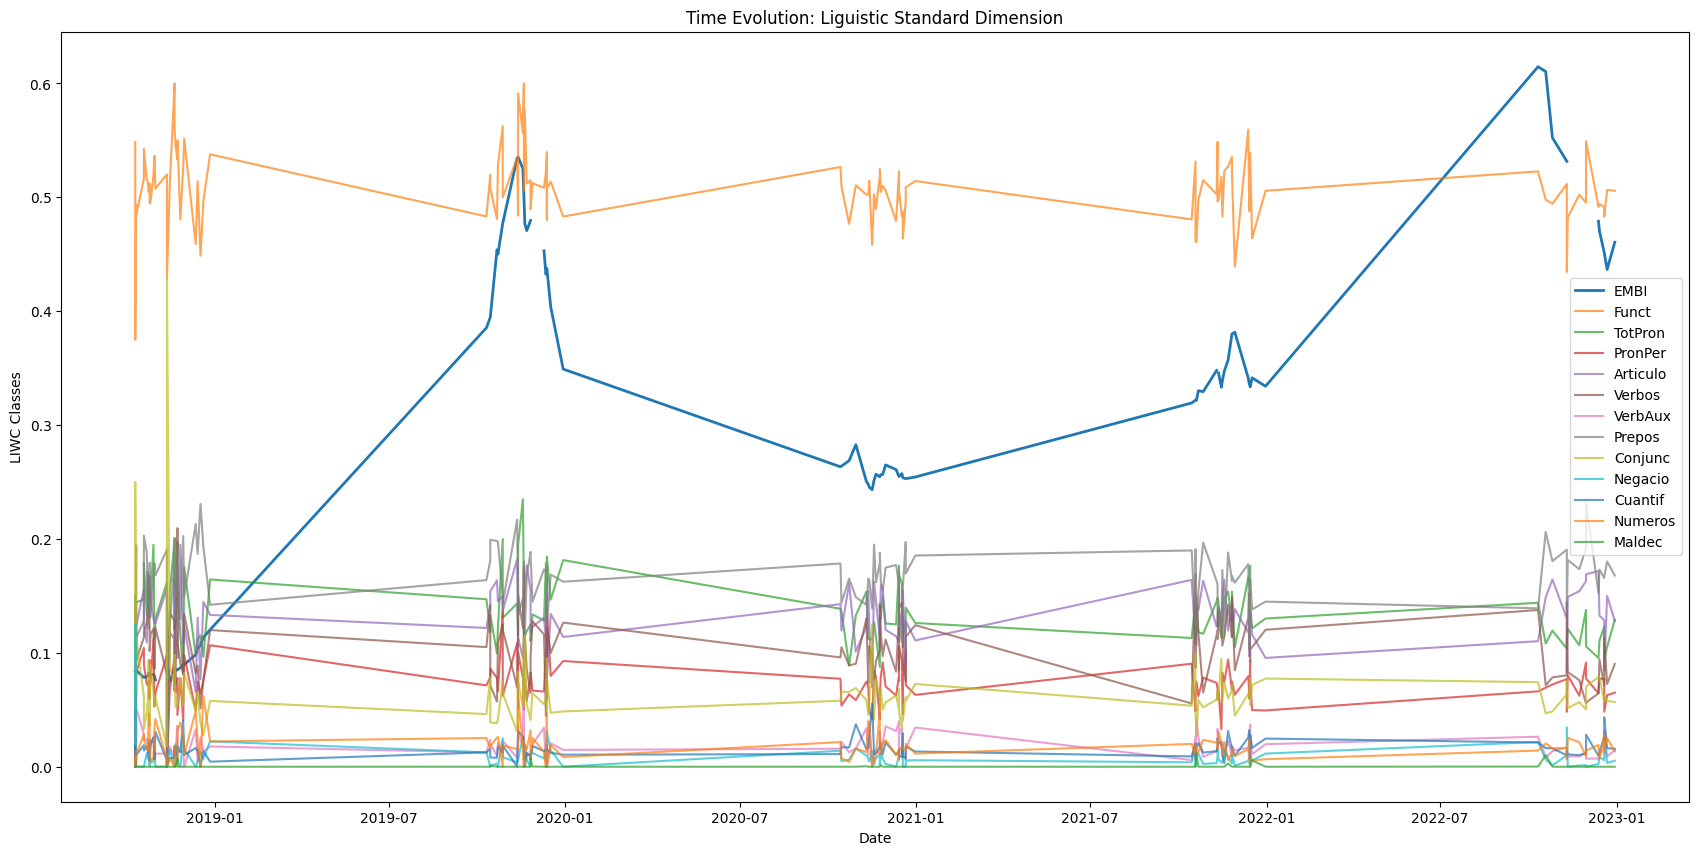


Liguistic Subject: ['Yo', 'Nosotro', 'TuUtd', 'ElElla', 'Ellos', 'PronImp']


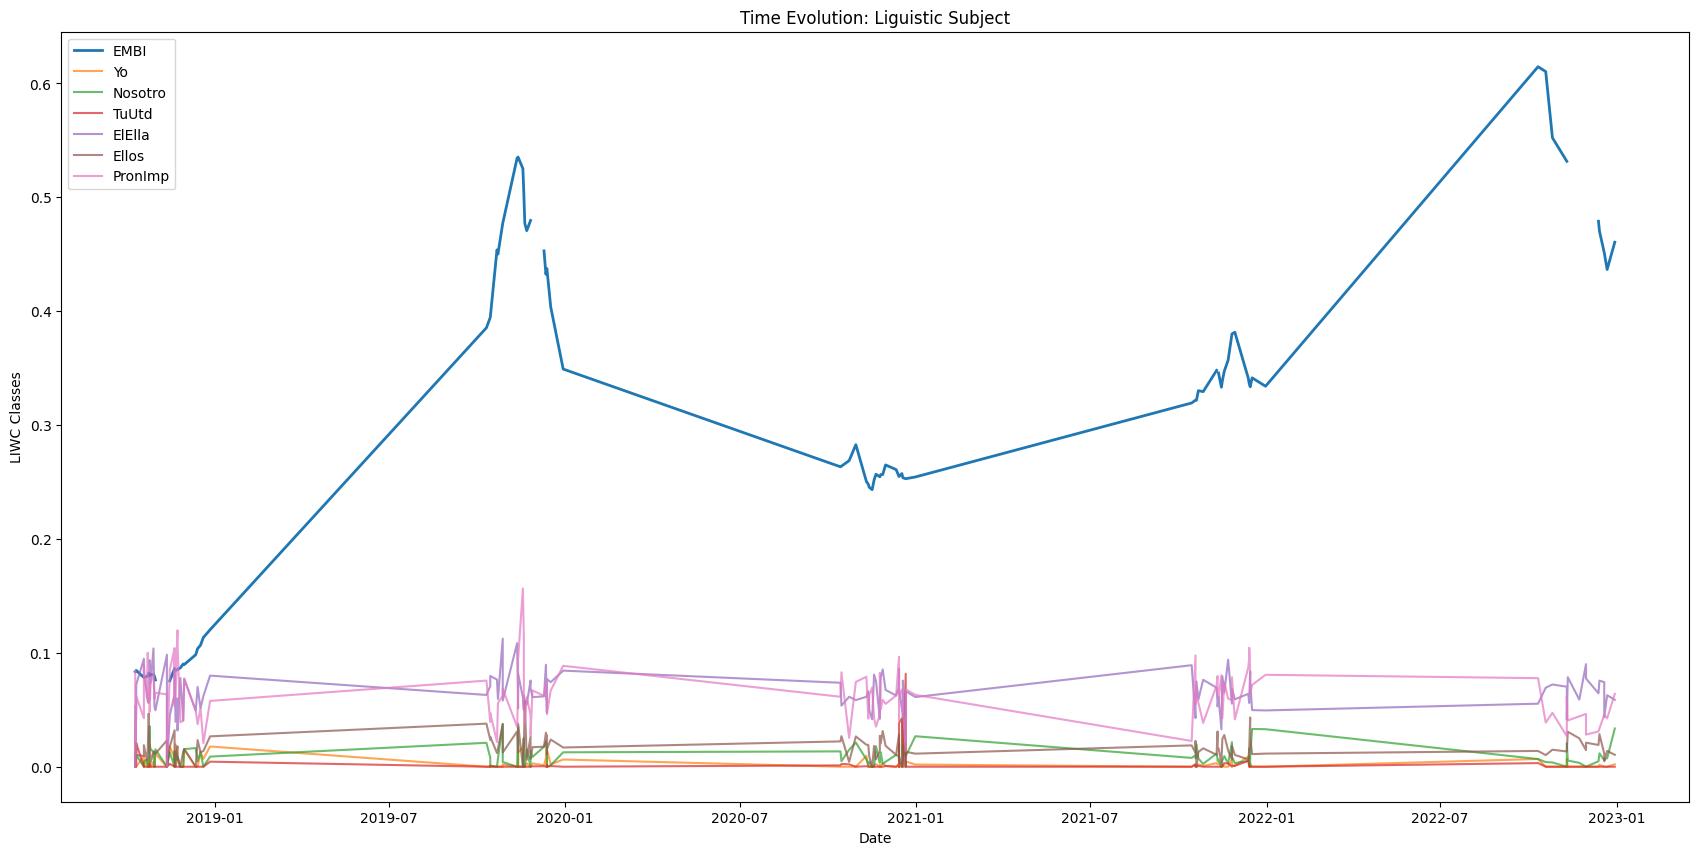


Linguistic Time: ['Pasado', 'Present', 'Futuro', 'Adverb']


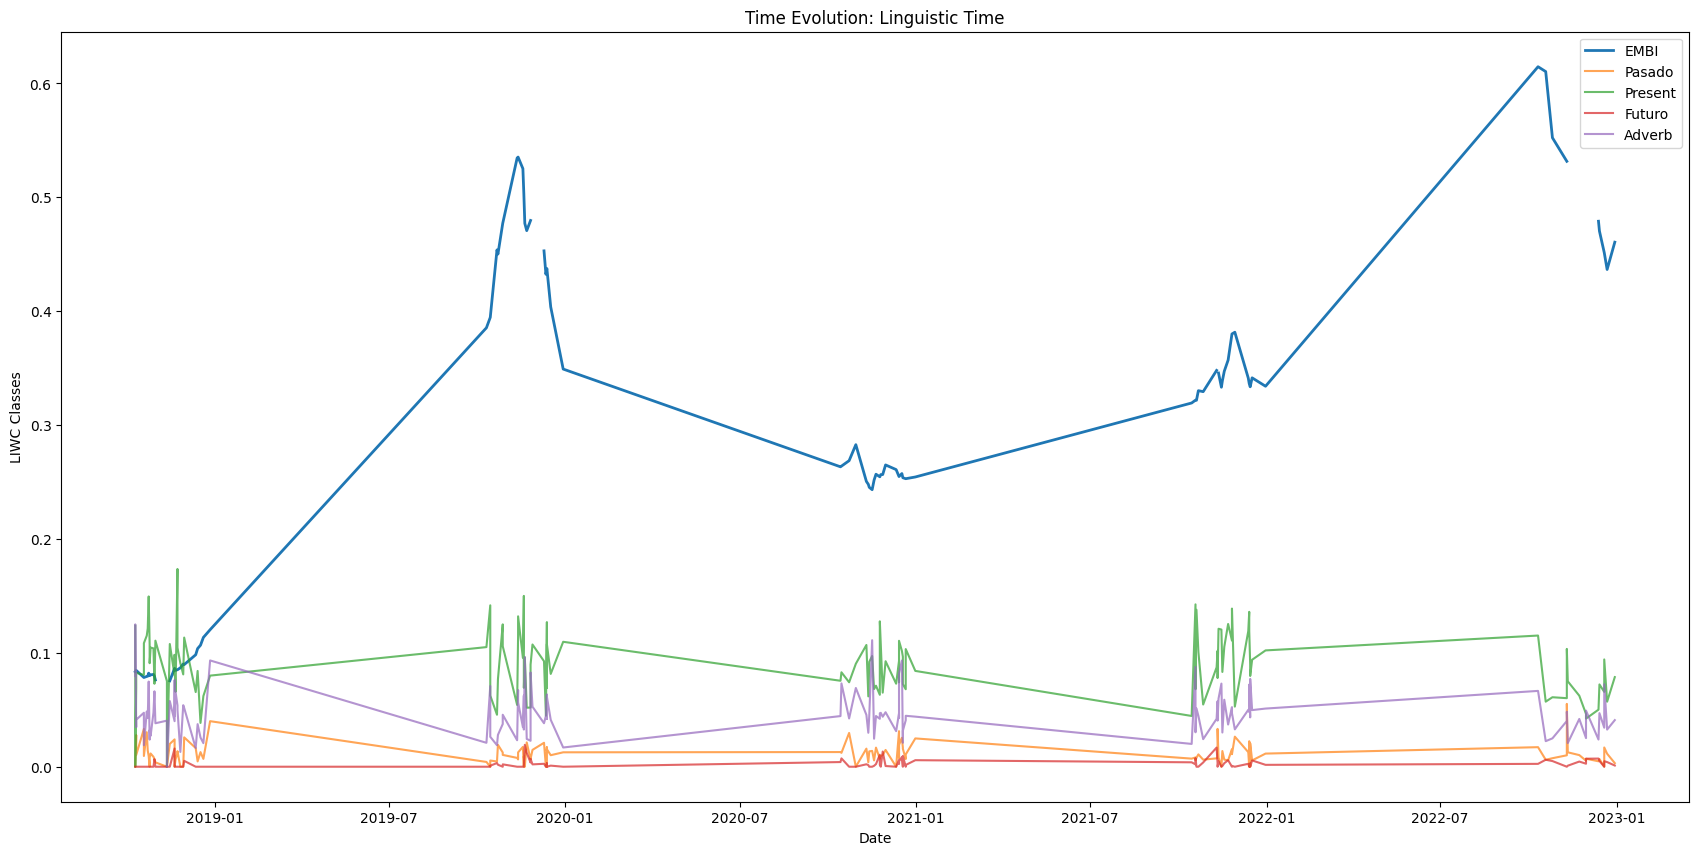


Verb: ['verbYO', 'verbTU', 'verbNOS', 'verbosEL', 'verbELLOS', 'Subjuntiv']


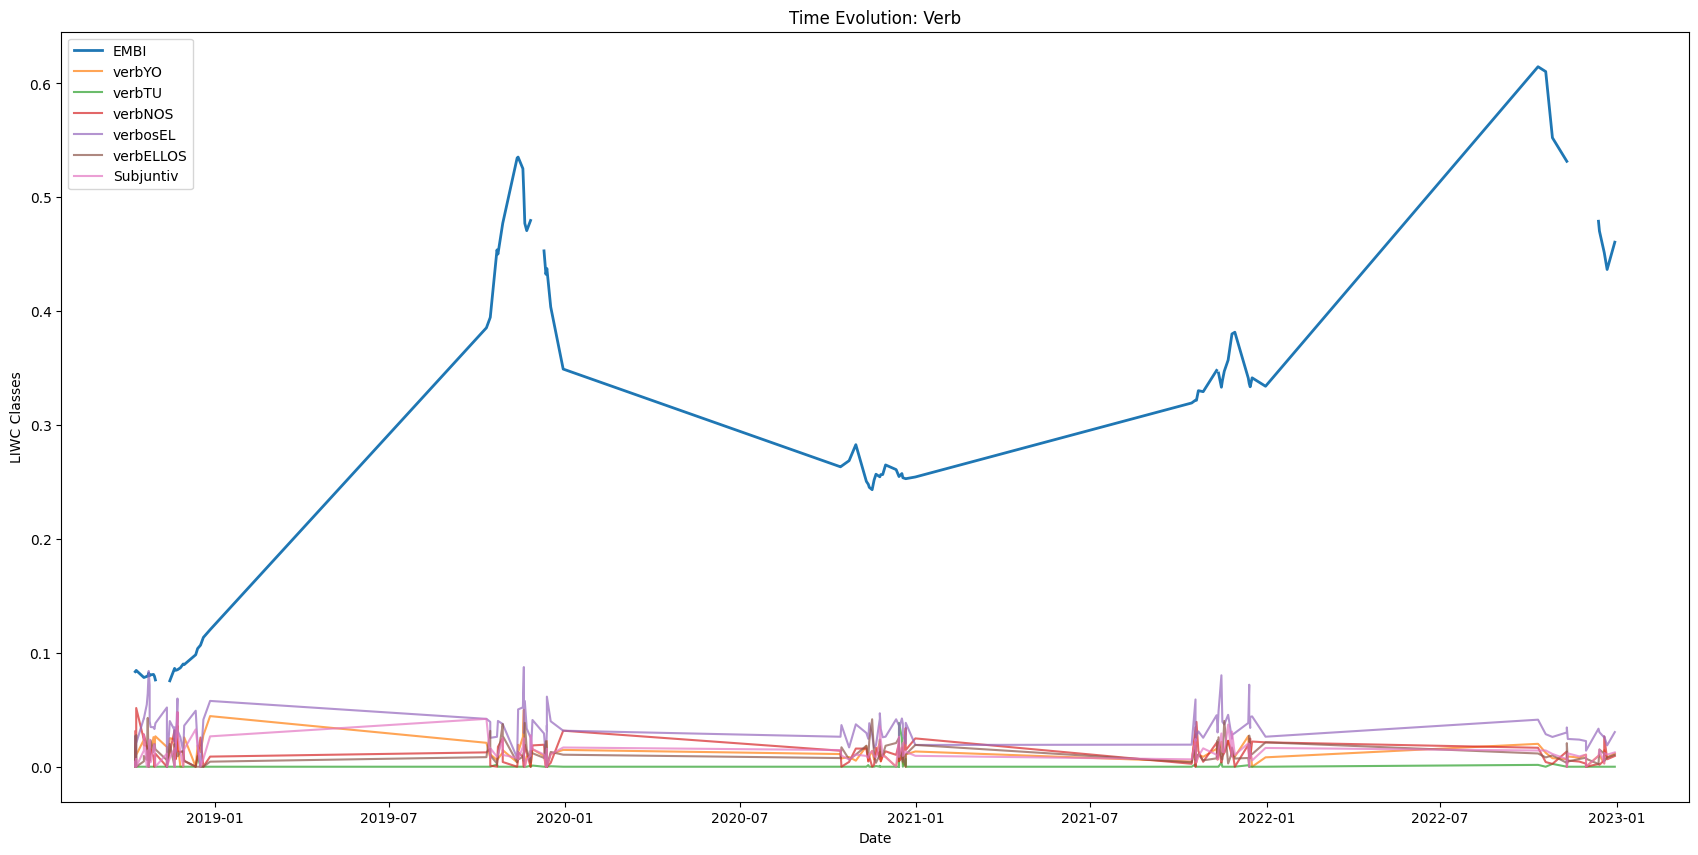


Formality: ['VosUtds', 'formal', 'informal', 'verbVos']


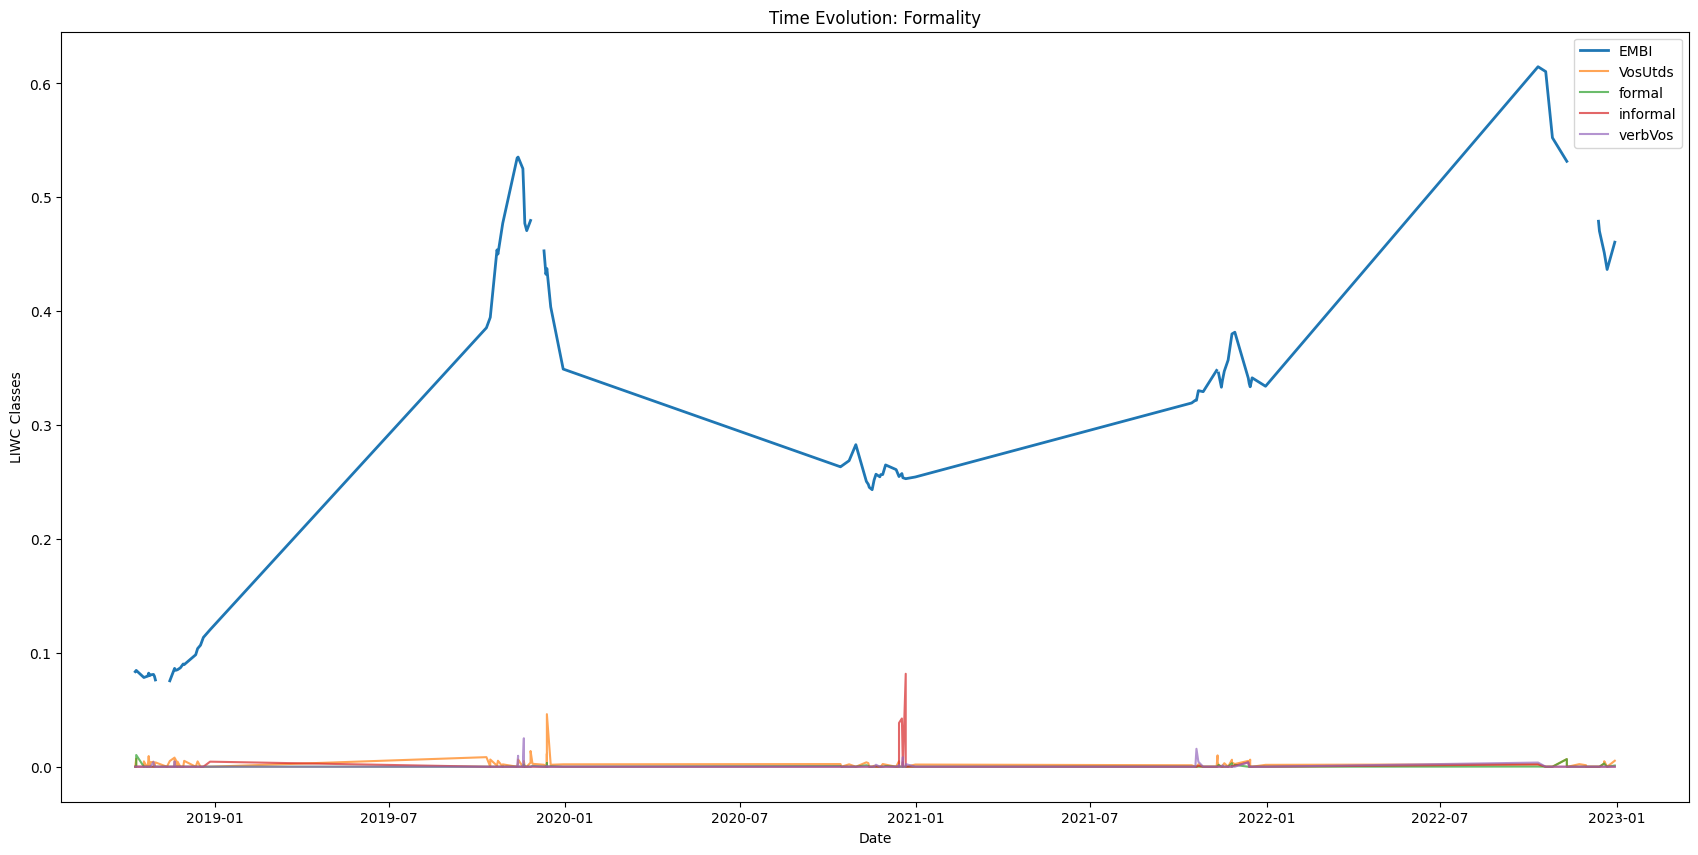


Social: ['Social', 'Familia', 'Amigos', 'Humanos']


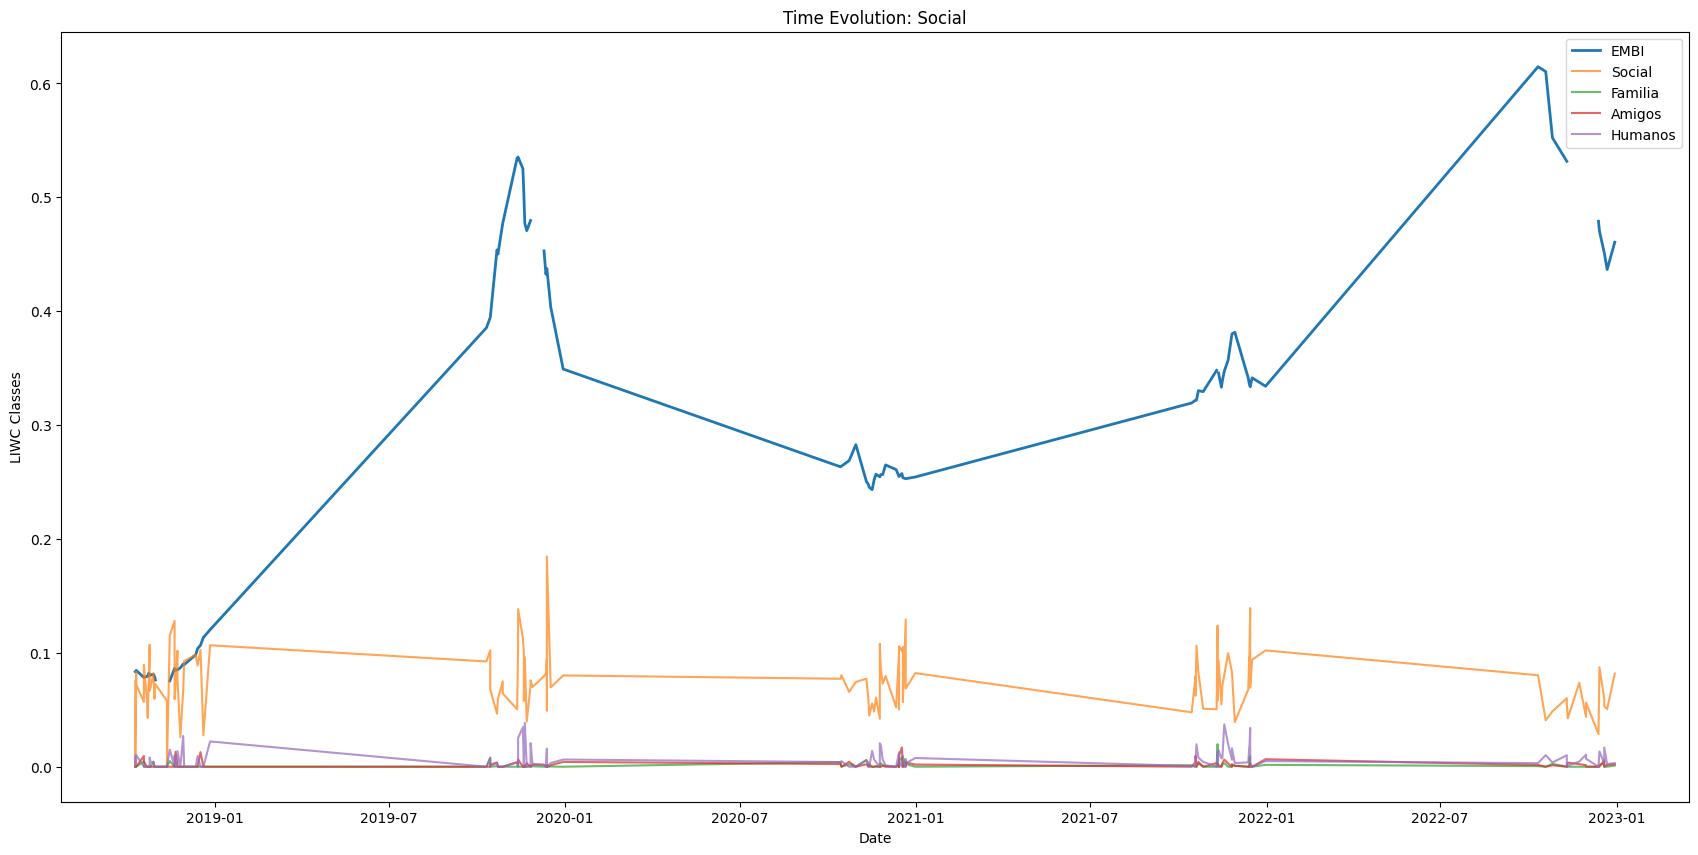


Emotion: ['Afect', 'EmoPos', 'EmoNeg', 'Ansiedad', 'Enfado', 'Triste']


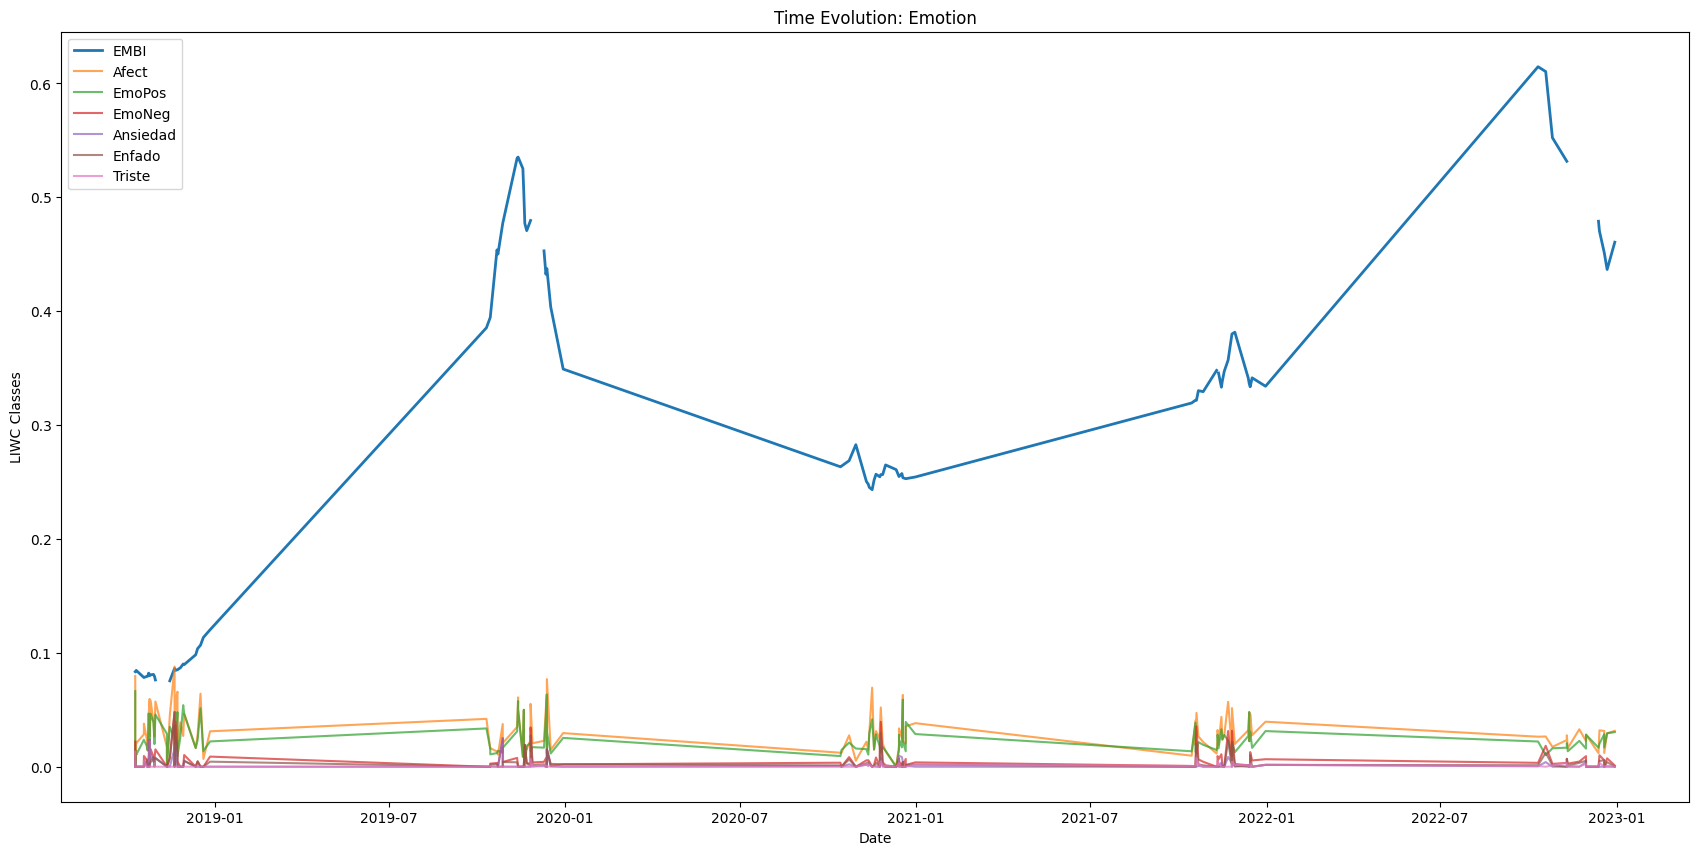


Cognitive: ['MecCog', 'Insight', 'Causa', 'Discrep', 'Tentat', 'Certeza', 'Inhib', 'Incl', 'Excl']


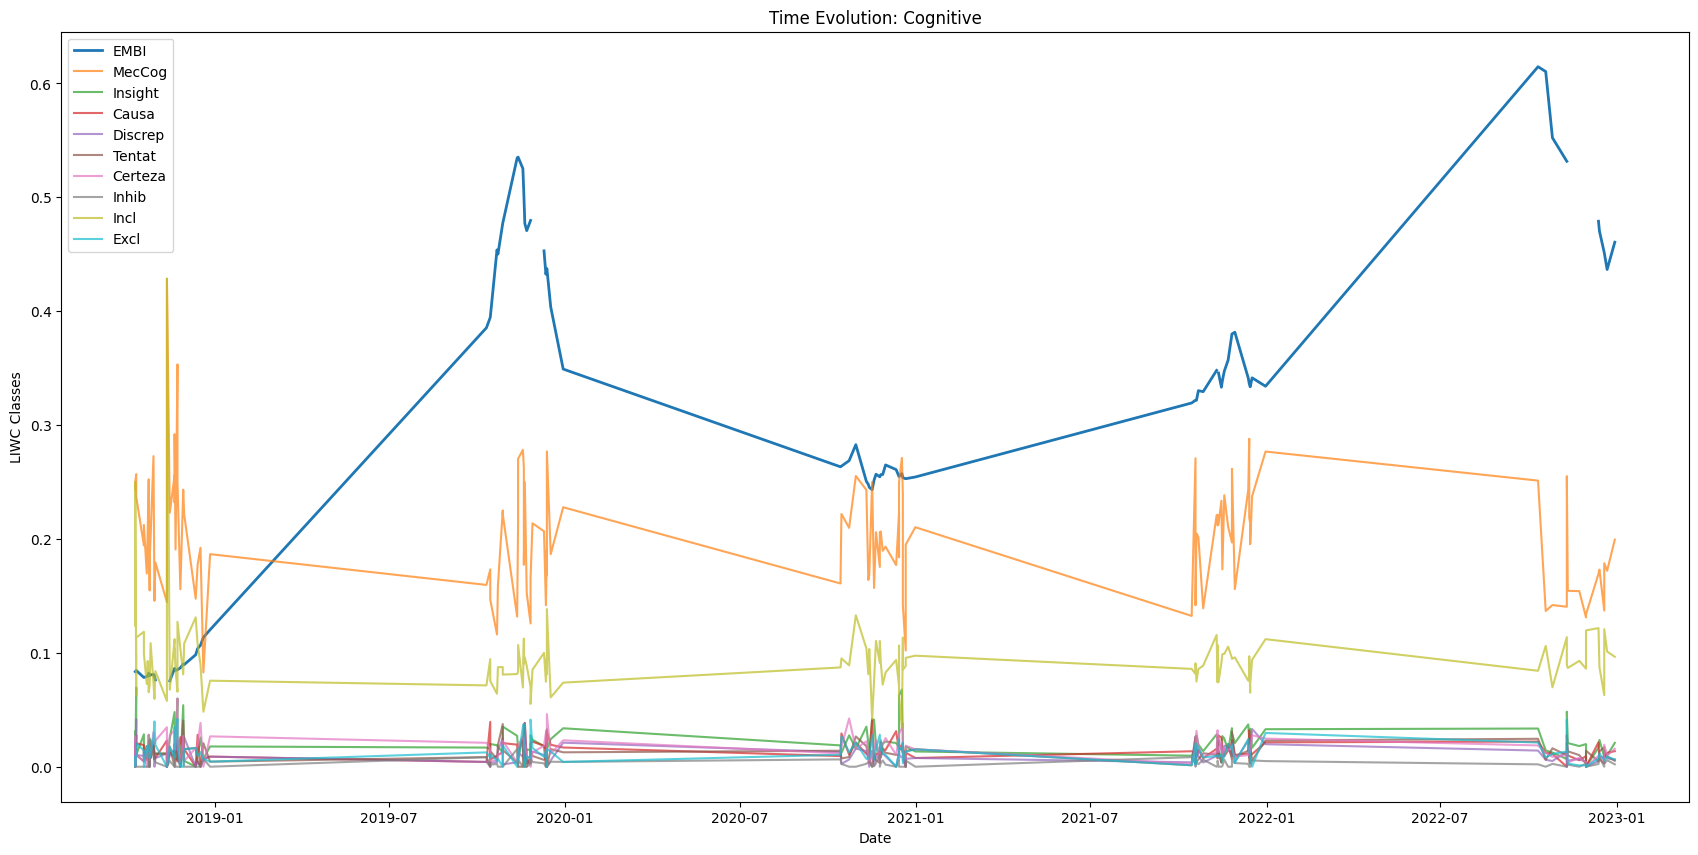


Perception: ['Percept', 'Ver', 'Oir', 'Sentir']


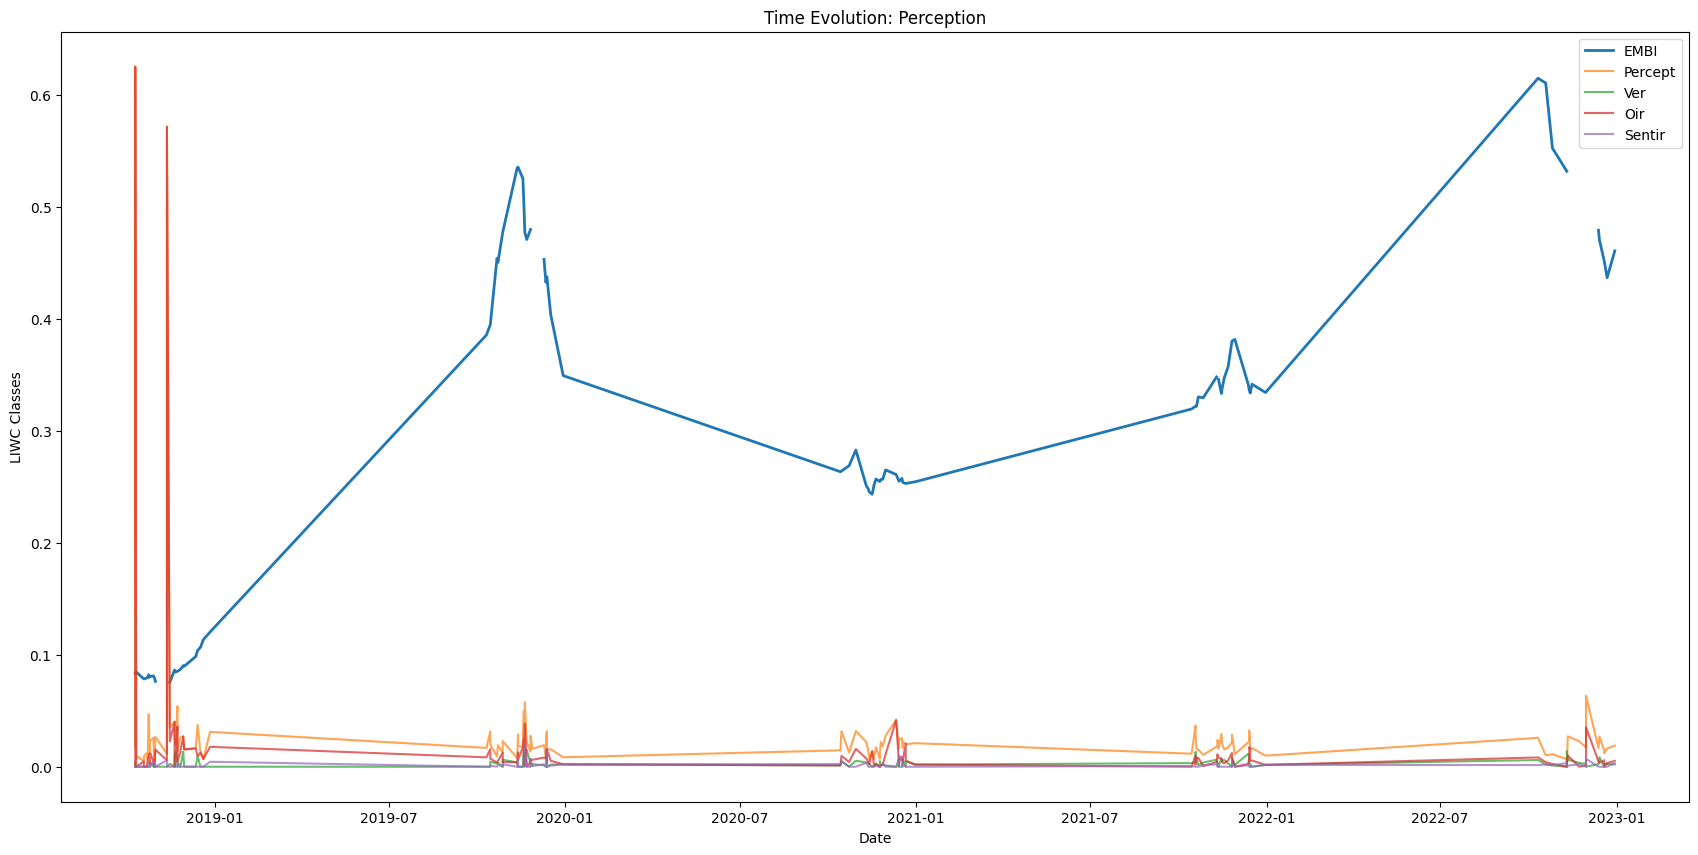


Biological: ['Biolog', 'Cuerpo', 'Salud', 'Sexual', 'Ingerir']


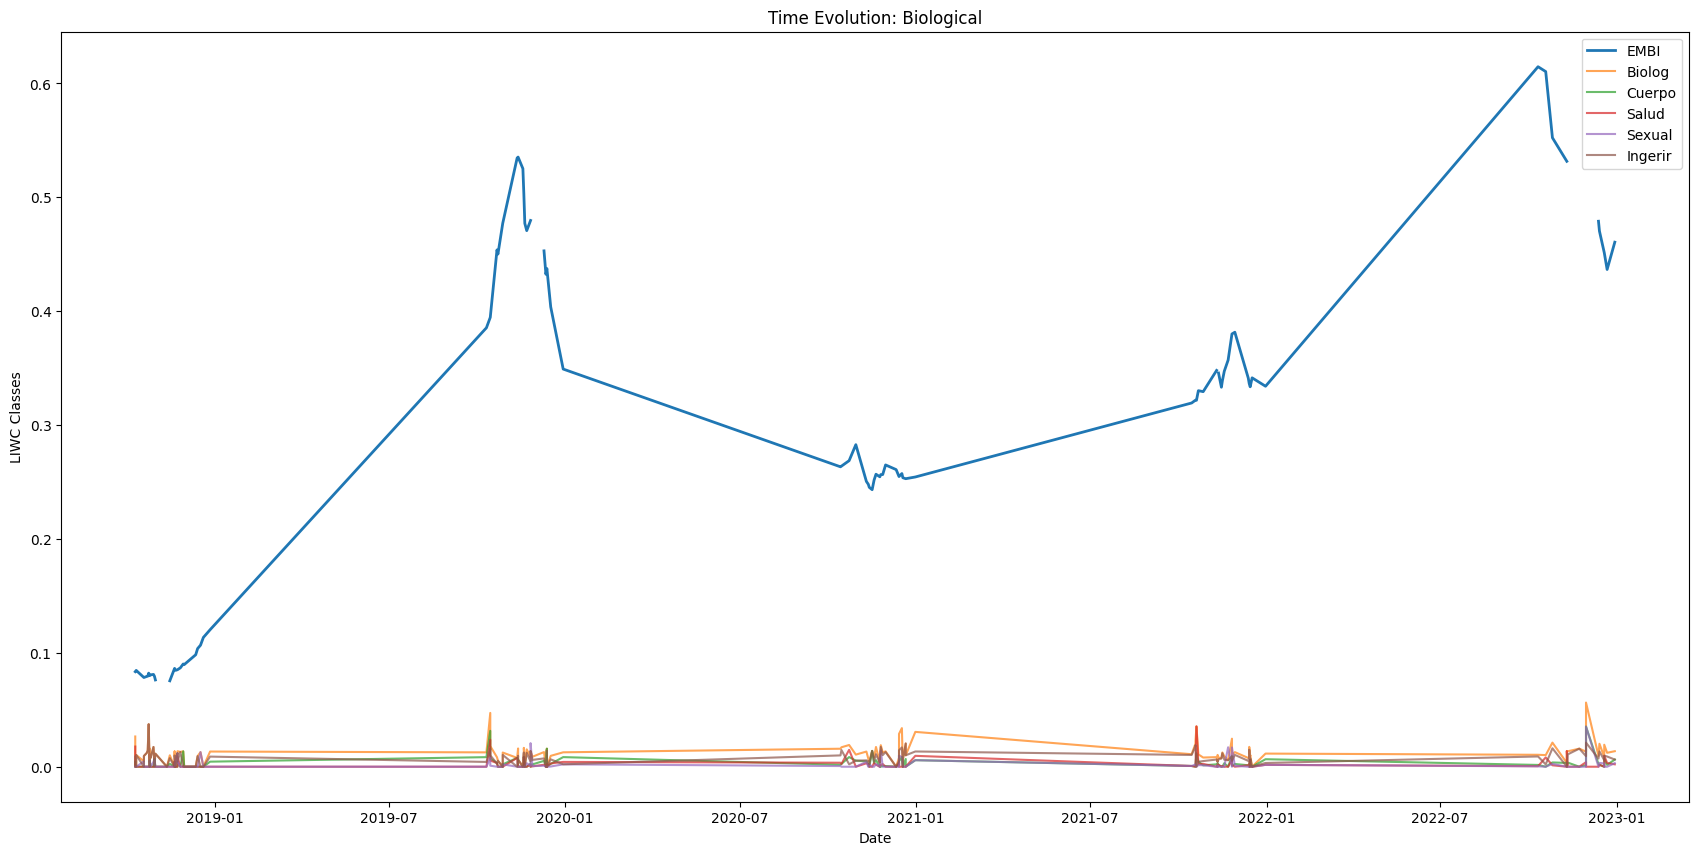


Relativity: ['Relativ', 'Movim', 'Espacio', 'Tiempo']


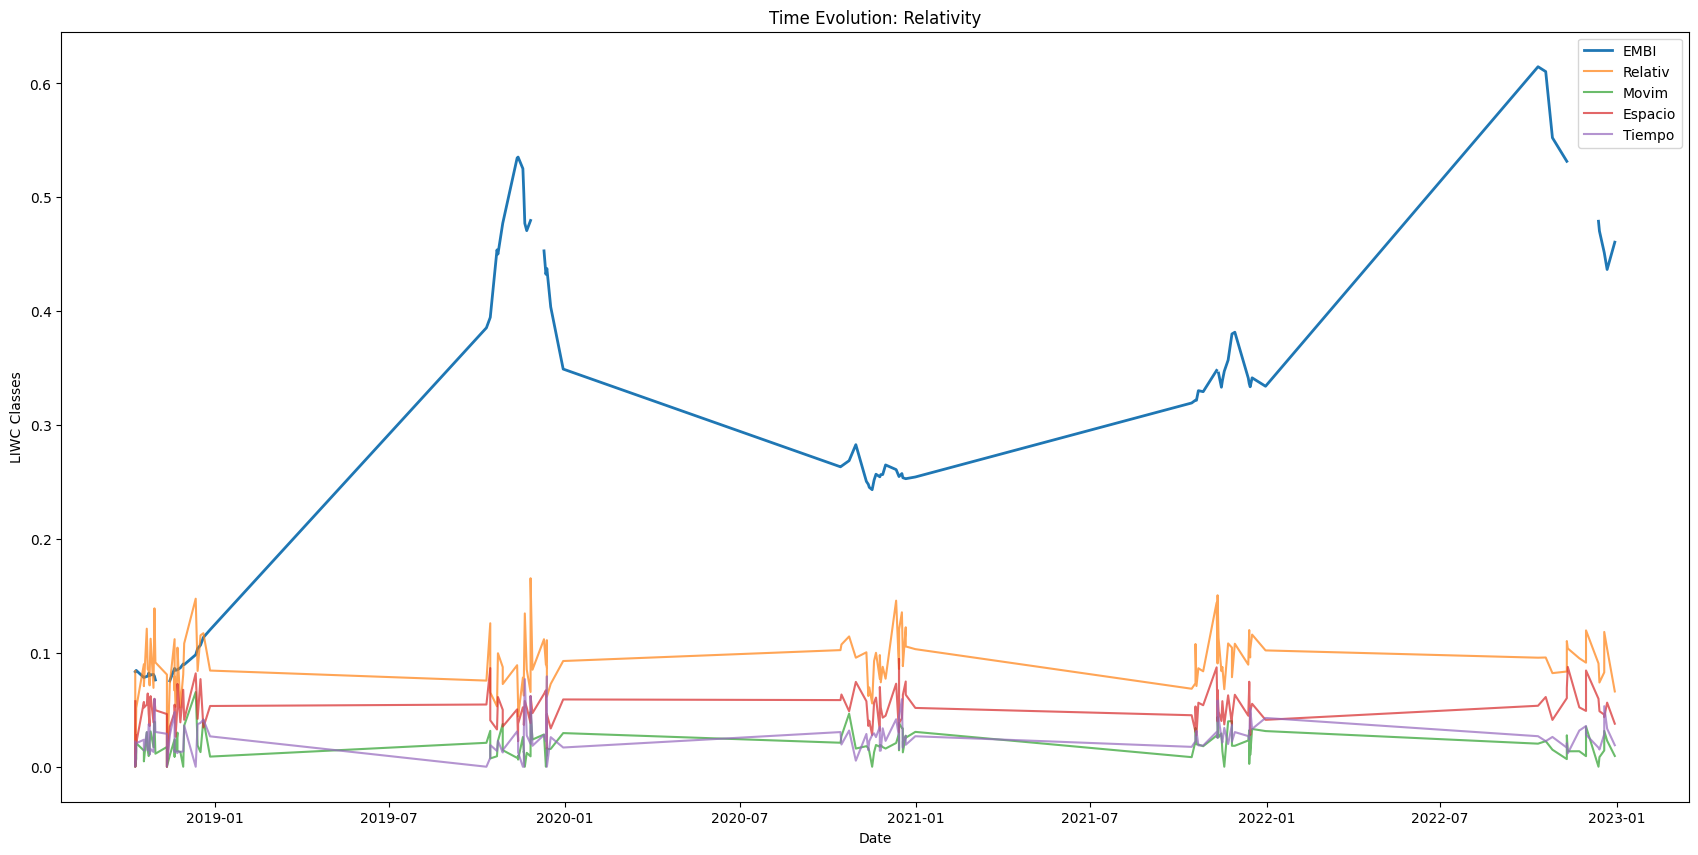


Personal Concerns: ['Trabajo', 'Logro', 'Placer', 'Hogar', 'Dinero', 'Relig', 'Muerte']


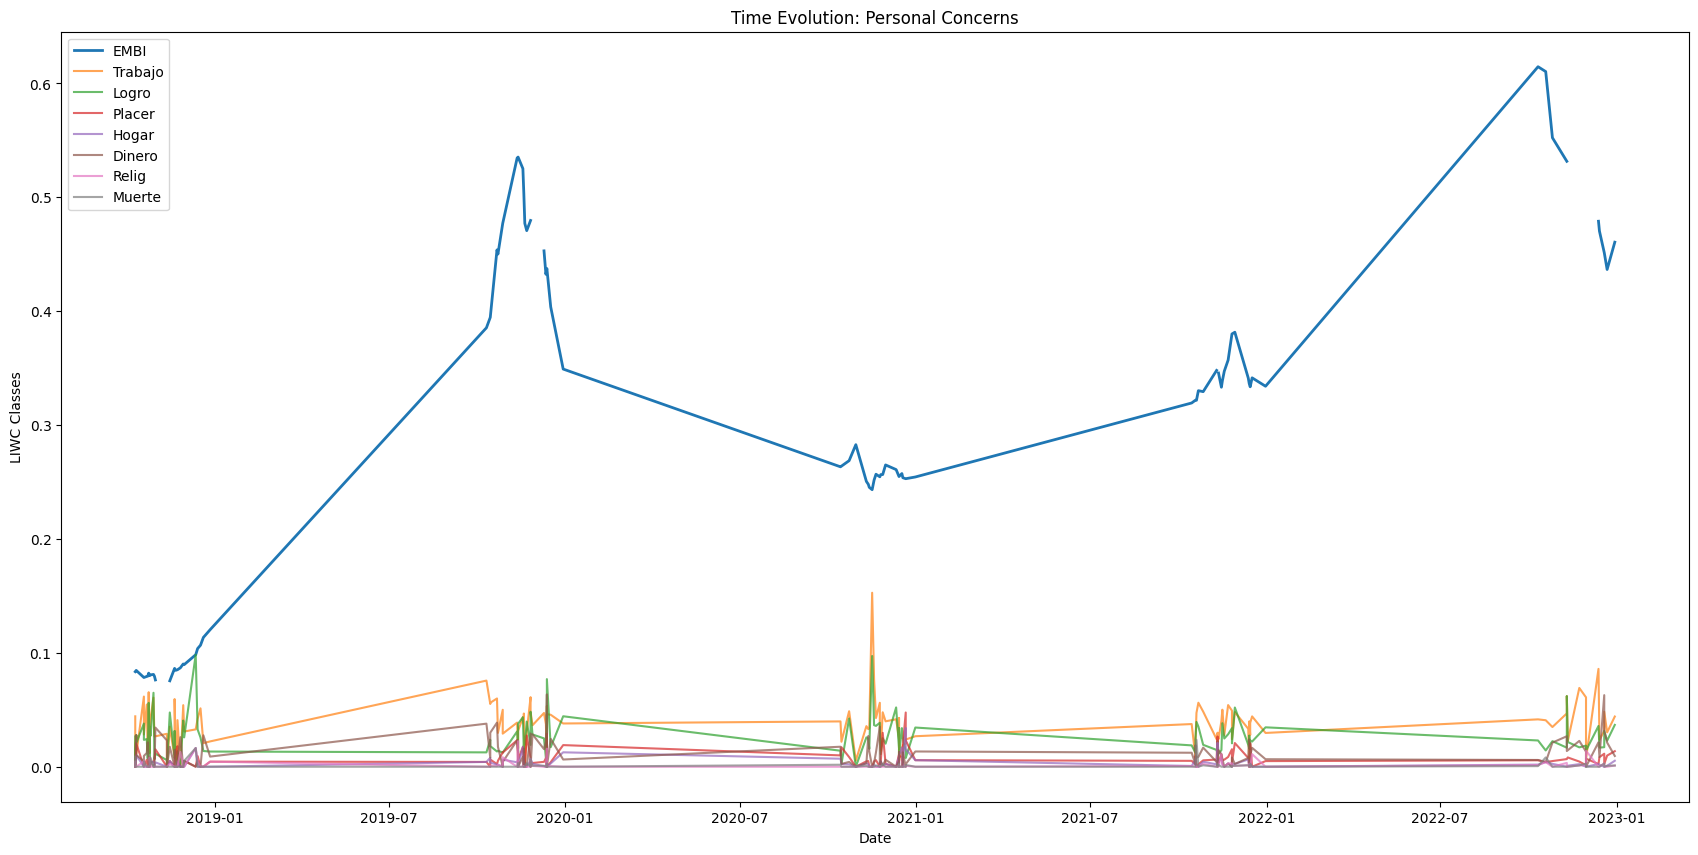


Spoken: ['Asentir', 'NoFluen', 'Relleno']


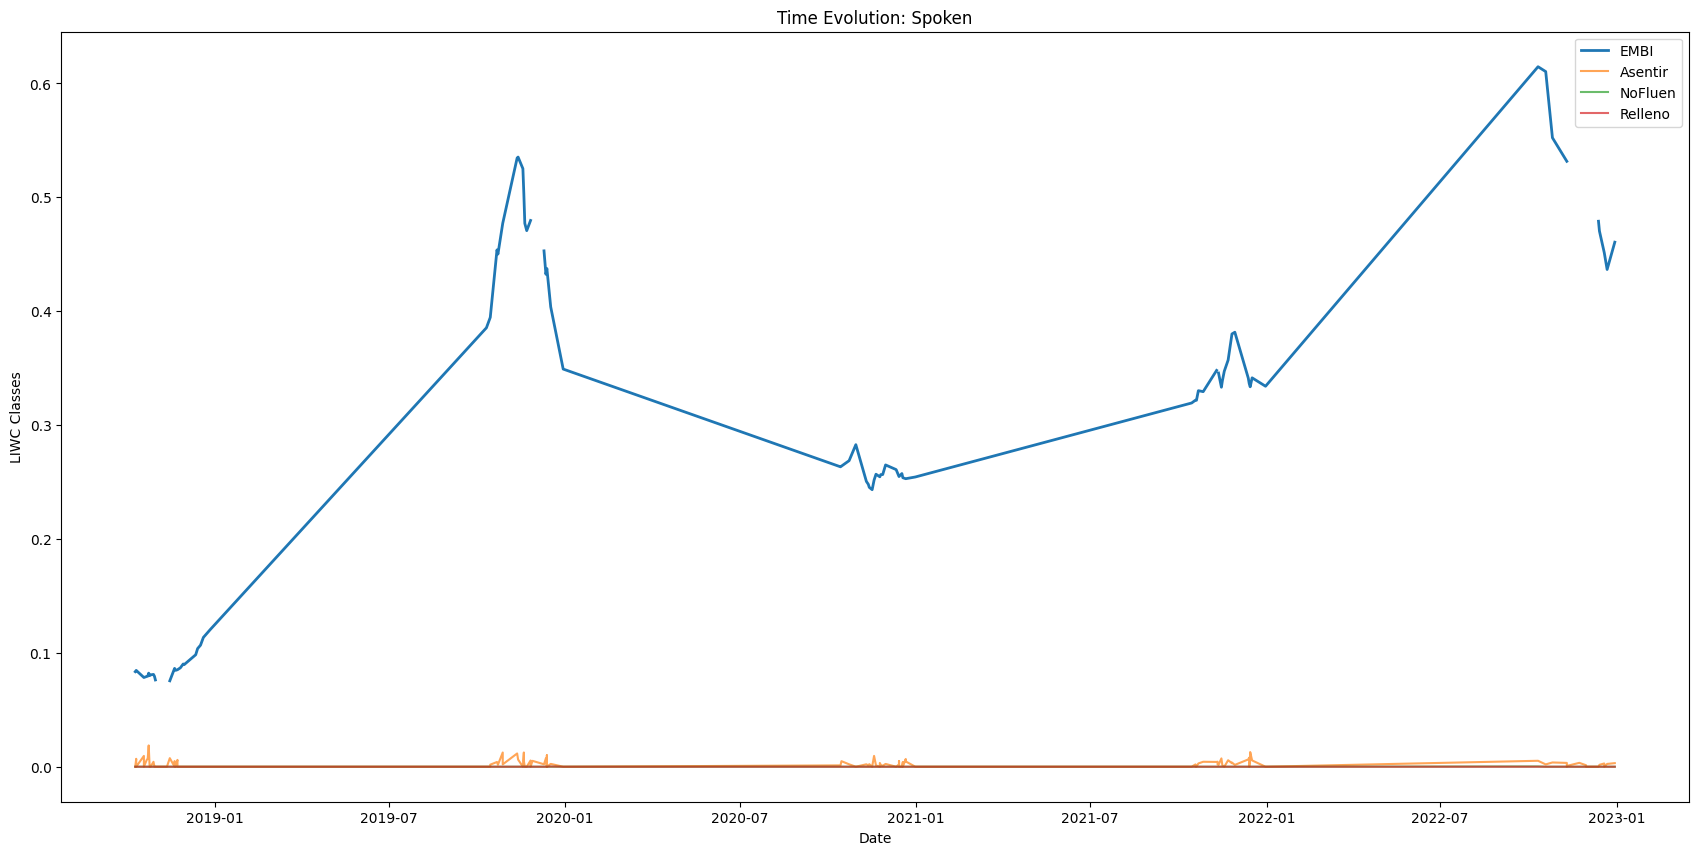

In [98]:
# @title Graph Trends

# Convert the 'date' column to datetime format if it's not already
desc_df = merged_df.copy()

# Set the 'date' column as the index
desc_df.set_index('date', inplace=True)

# Iterate through all columns (excluding 'date')
for category_name in class_categories:
  classes = class_categories[category_name]

  print()
  print(f'{category_name}: {classes}')

  date_diff = (desc_df.index.max() - desc_df.index.min()).days + 1
  plt.figure(figsize=(21,10))  # Adjust figure size as needed

  # Plotting EMBI with a thicker line
  plt.plot(desc_df['embi'], label='EMBI', linewidth=2)

  # Plotting other classes with lower opacity
  for class_label in classes:
      plt.plot(desc_df[class_label], label=class_label, alpha=0.7)

  plt.title(f'Time Evolution: {category_name}')
  plt.xlabel('Date')
  plt.ylabel('LIWC Classes')

  # Ensure the legend is displayed
  plt.legend()

  name_formatted = category_name.replace(' ', '_').lower()
  plt.savefig(f'../data/03-final/others/graphs/{name_formatted}-time_evolution.png')
  plt.show()


Liguistic Standard Dimension: ['Funct', 'TotPron', 'PronPer', 'Articulo', 'Verbos', 'VerbAux', 'Prepos', 'Conjunc', 'Negacio', 'Cuantif', 'Numeros', 'Maldec']


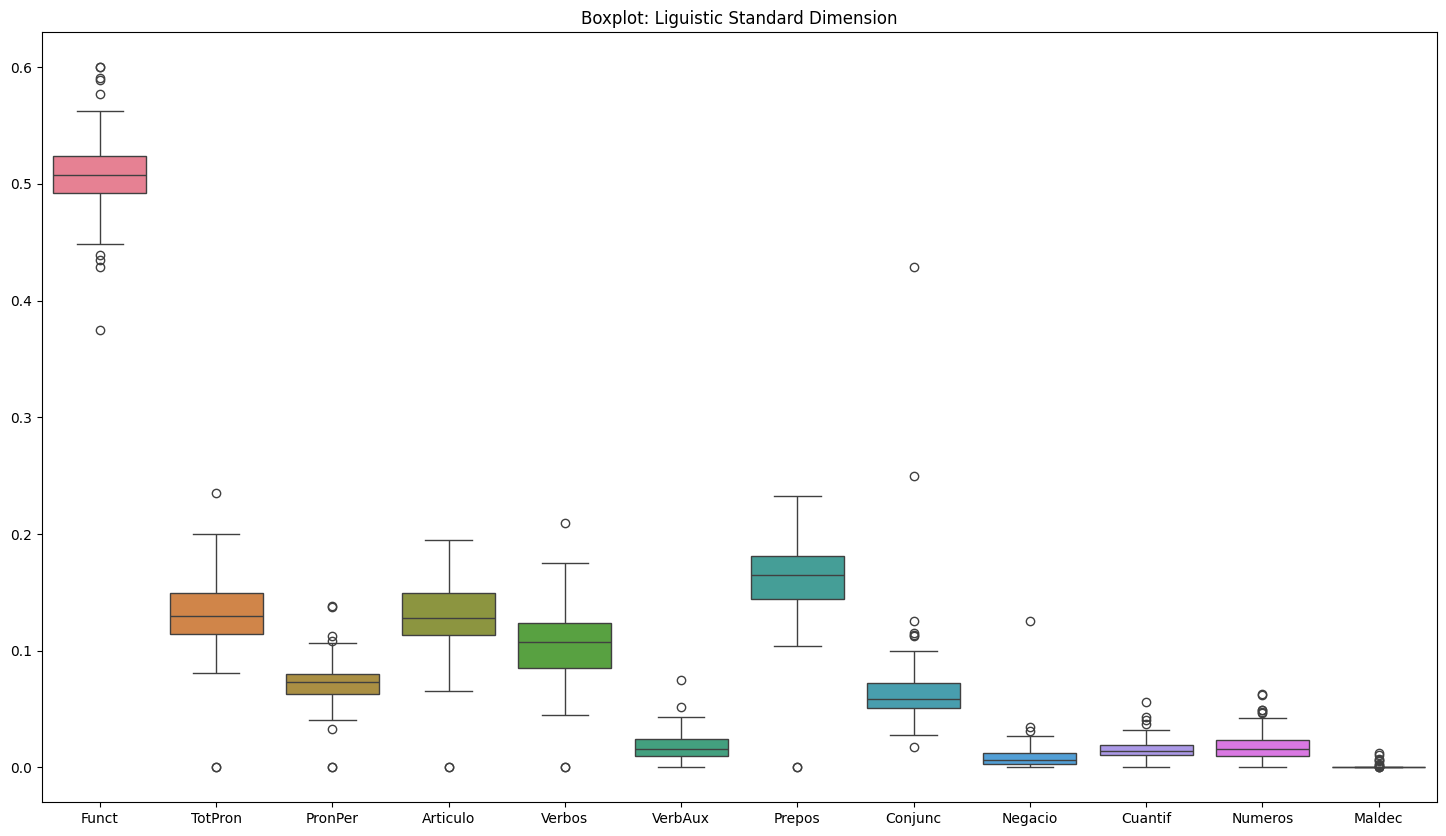


Liguistic Subject: ['Yo', 'Nosotro', 'TuUtd', 'ElElla', 'Ellos', 'PronImp']


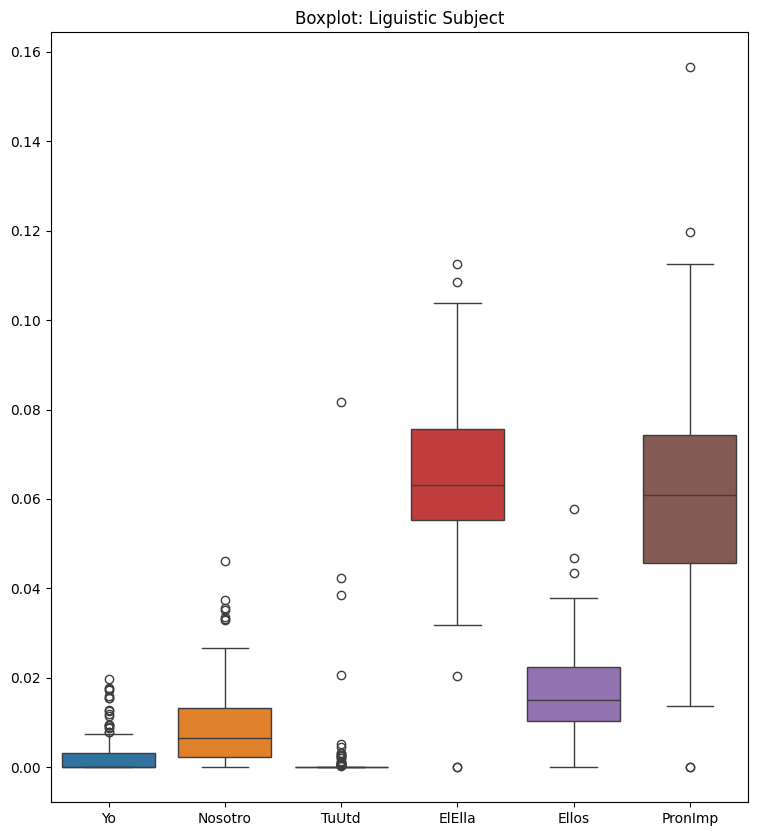


Linguistic Time: ['Pasado', 'Present', 'Futuro', 'Adverb']


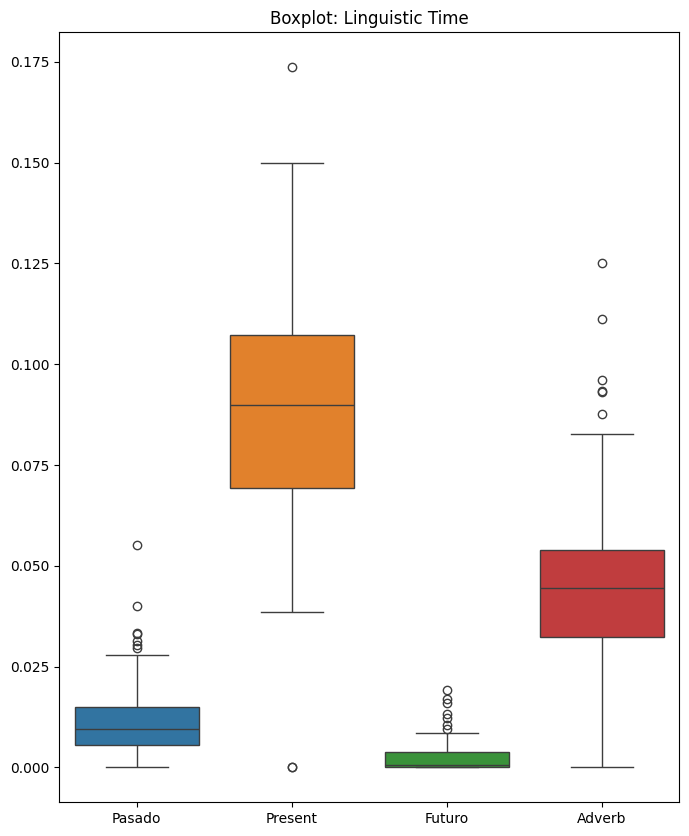


Verb: ['verbYO', 'verbTU', 'verbNOS', 'verbosEL', 'verbELLOS', 'Subjuntiv']


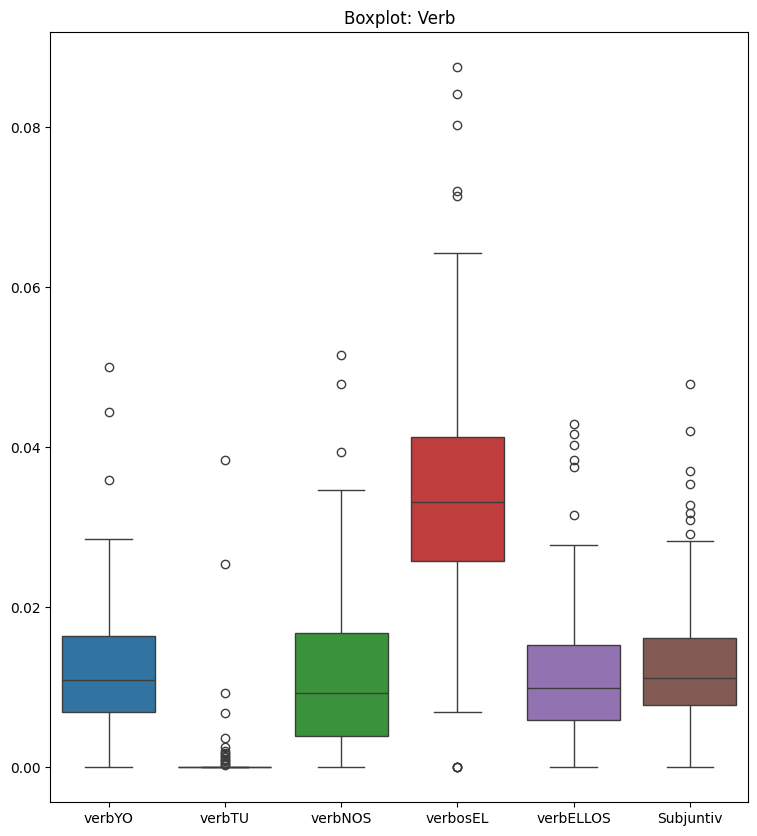


Formality: ['VosUtds', 'formal', 'informal', 'verbVos']


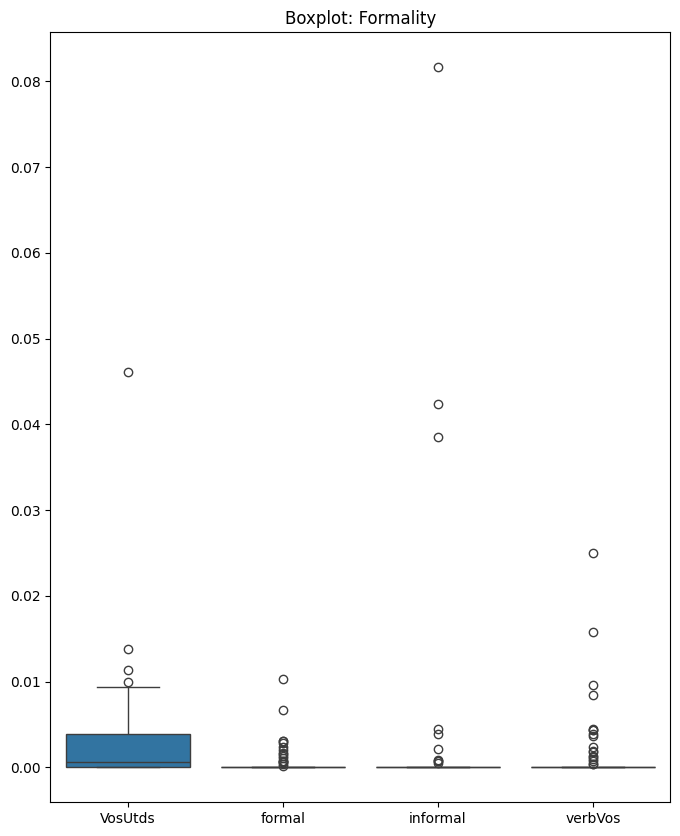


Social: ['Social', 'Familia', 'Amigos', 'Humanos']


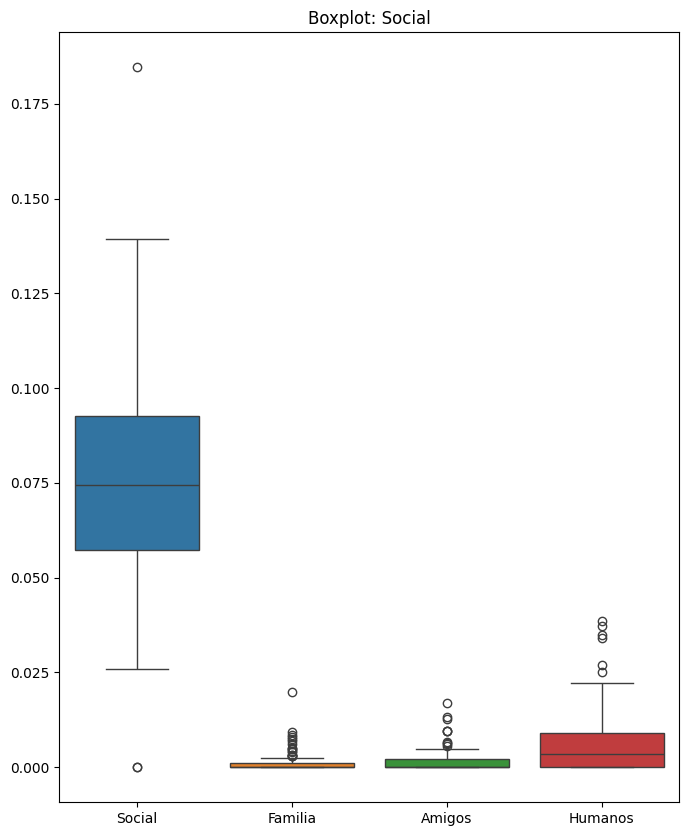


Emotion: ['Afect', 'EmoPos', 'EmoNeg', 'Ansiedad', 'Enfado', 'Triste']


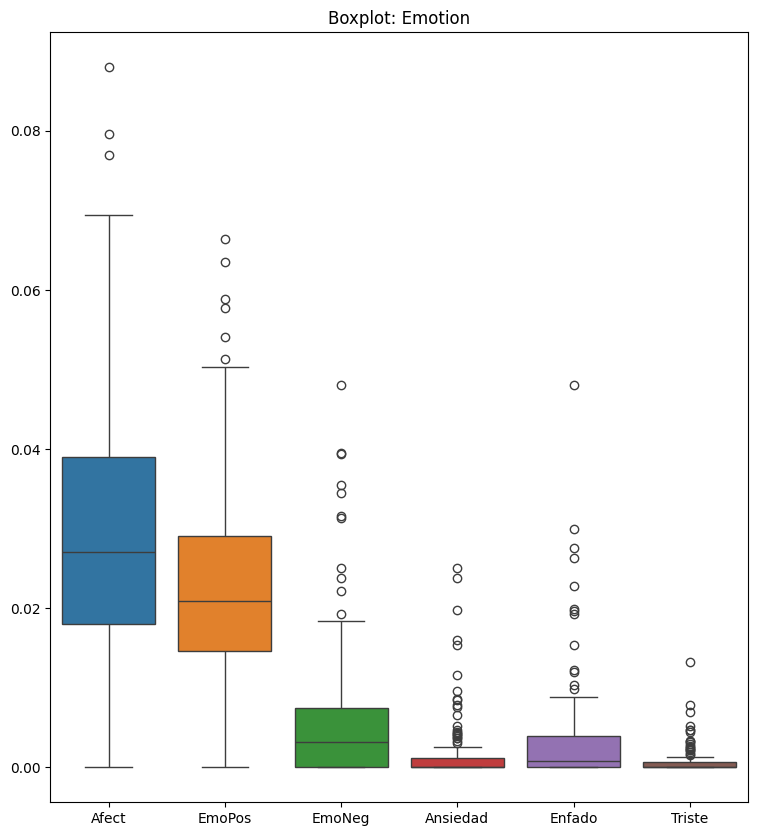


Cognitive: ['MecCog', 'Insight', 'Causa', 'Discrep', 'Tentat', 'Certeza', 'Inhib', 'Incl', 'Excl']


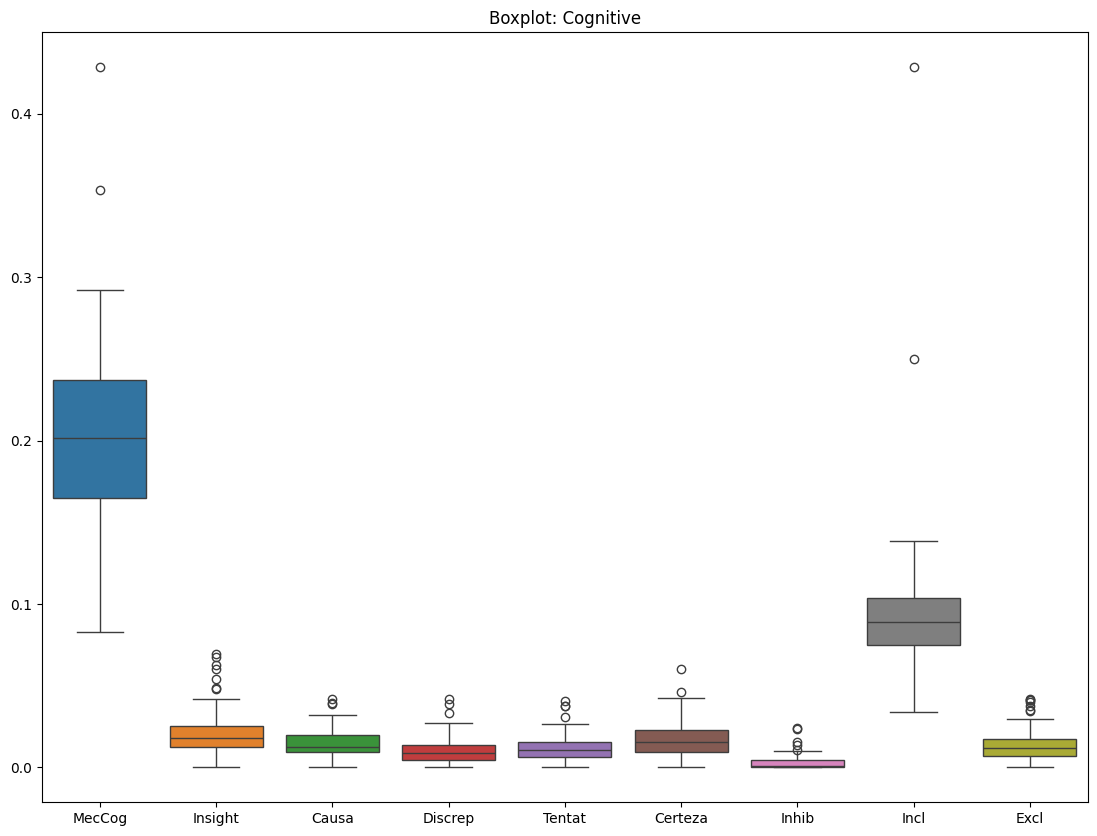


Perception: ['Percept', 'Ver', 'Oir', 'Sentir']


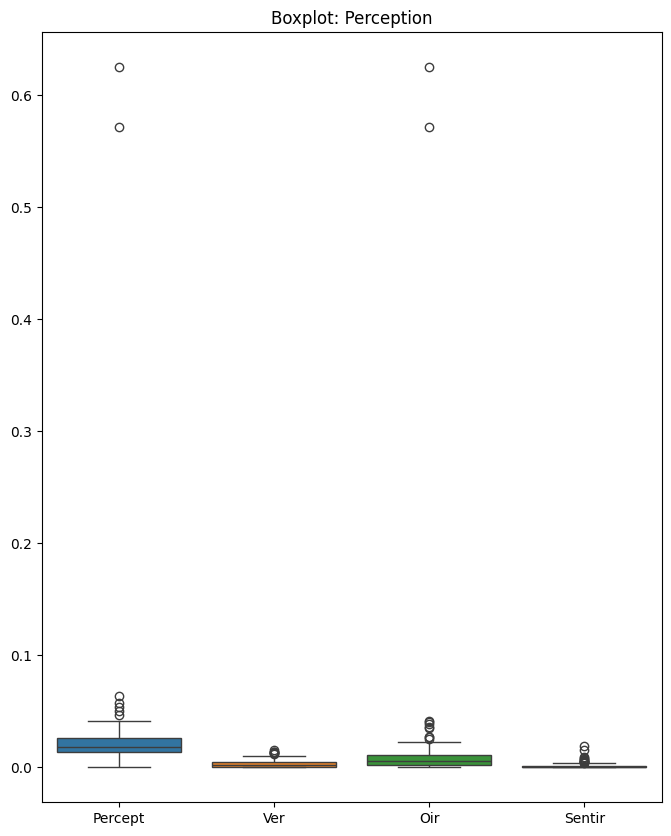


Biological: ['Biolog', 'Cuerpo', 'Salud', 'Sexual', 'Ingerir']


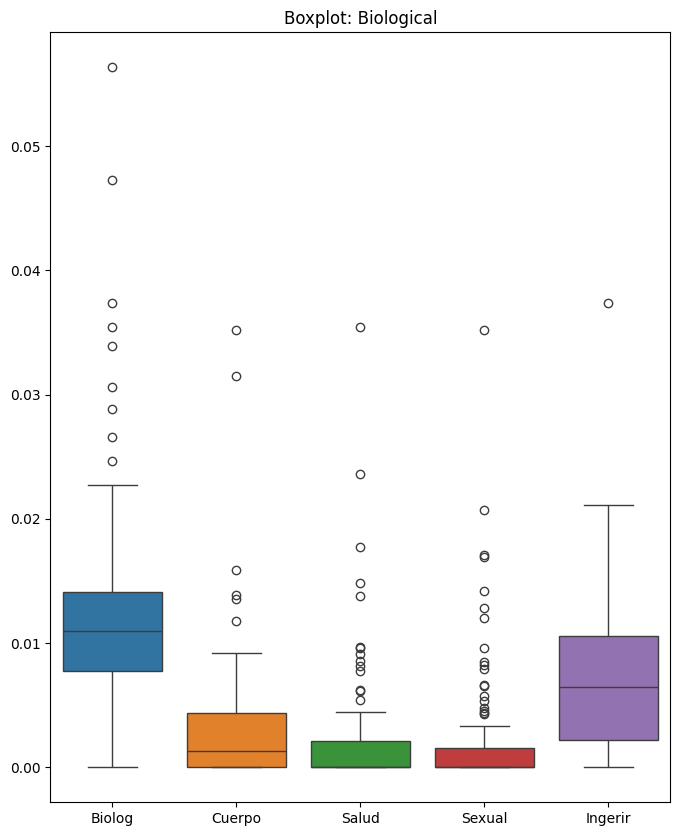


Relativity: ['Relativ', 'Movim', 'Espacio', 'Tiempo']


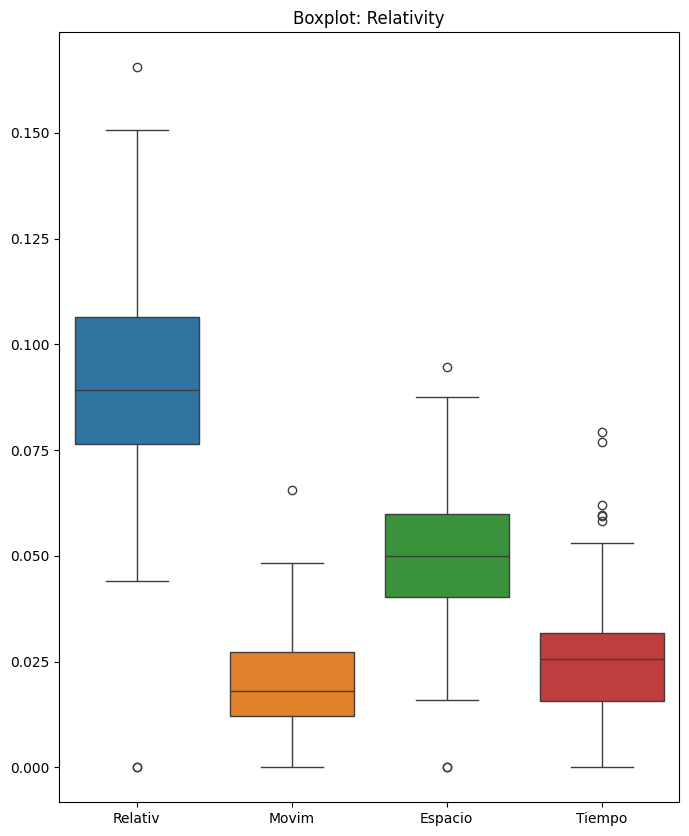


Personal Concerns: ['Trabajo', 'Logro', 'Placer', 'Hogar', 'Dinero', 'Relig', 'Muerte']


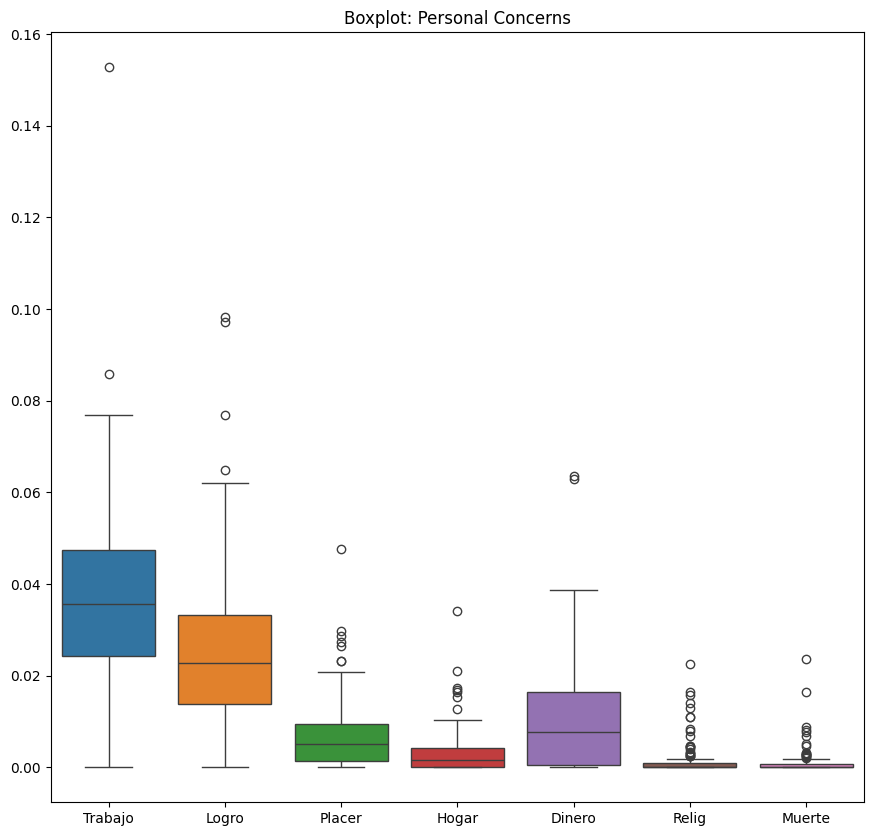


Spoken: ['Asentir', 'NoFluen', 'Relleno']


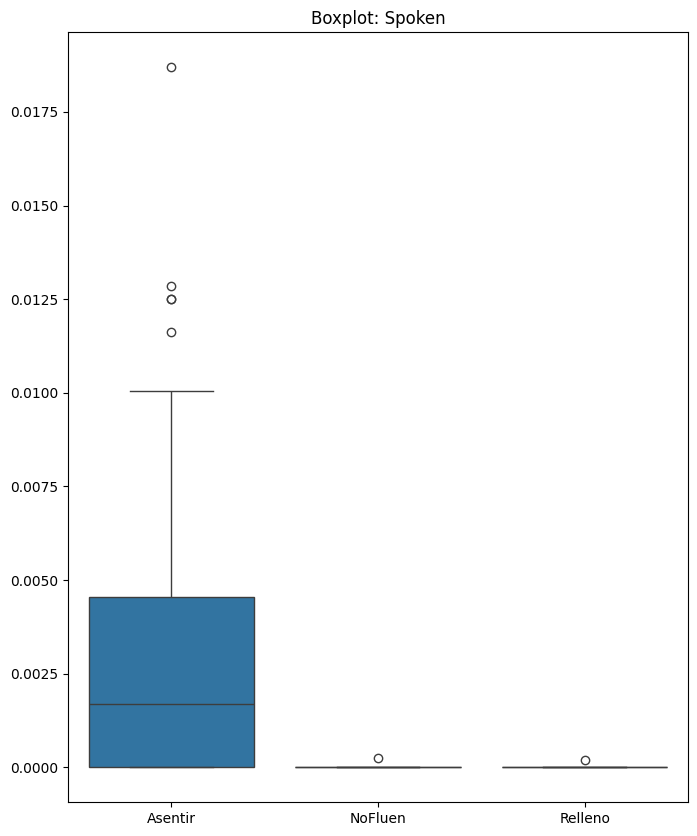

In [99]:
##title Boxplot
for category_name in class_categories:
  classes = class_categories[category_name]

  print()
  print(f'{category_name}: {classes}')

  # Create a boxplot
  date_diff = (desc_df.index.max() - desc_df.index.min()).days + 1
  plt.figure(figsize=(max(8,len(classes)*1.5),10))  # Adjust figure size as needed

  sns.boxplot(data=desc_df[classes])
  plt.title(f'Boxplot: {category_name}')
  name_formatted = category_name.replace(' ','_').lower()
  plt.savefig(f'../data/03-final/others/graphs/{name_formatted}-boxplot.png')
  plt.show()

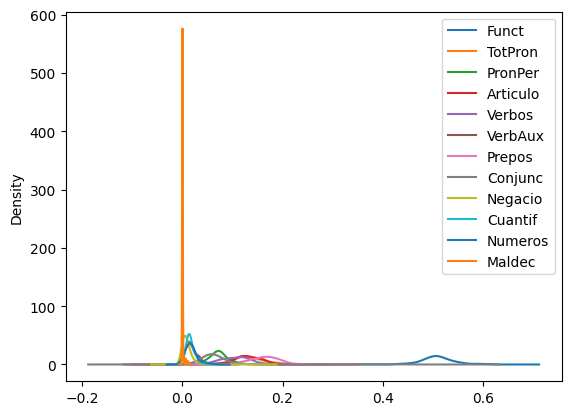

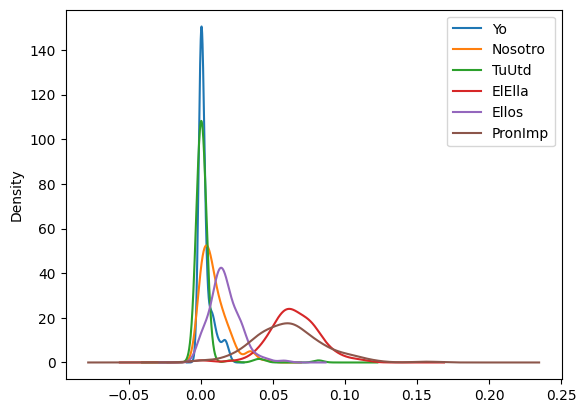

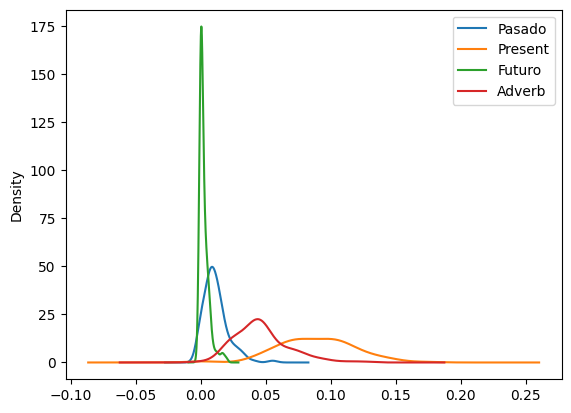

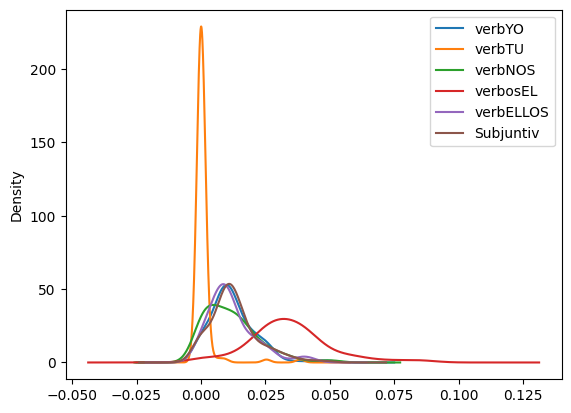

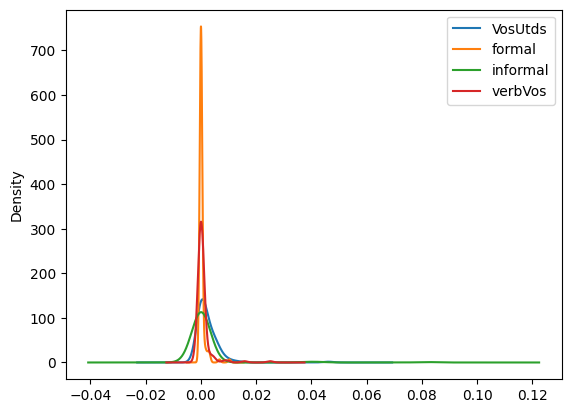

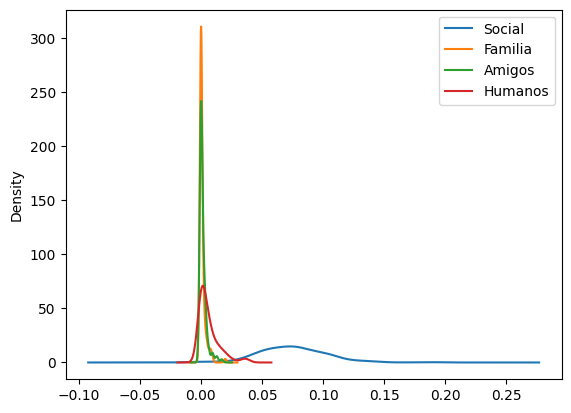

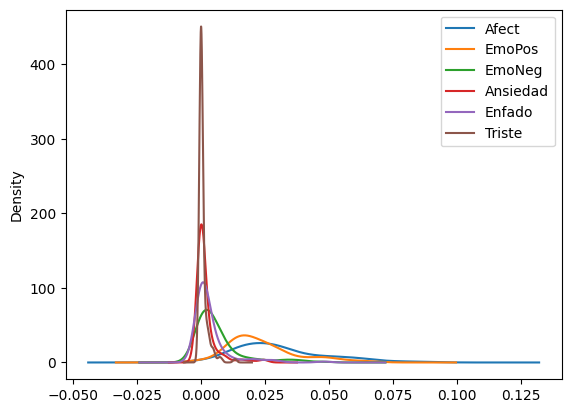

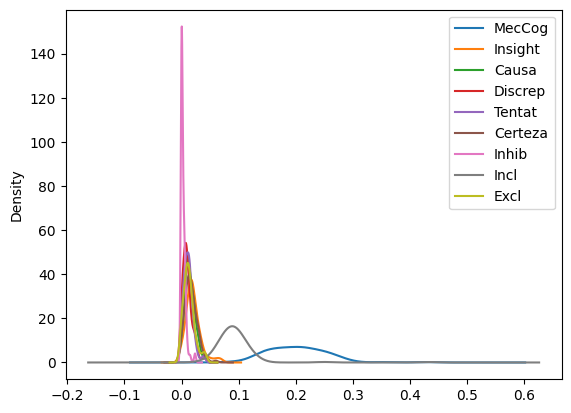

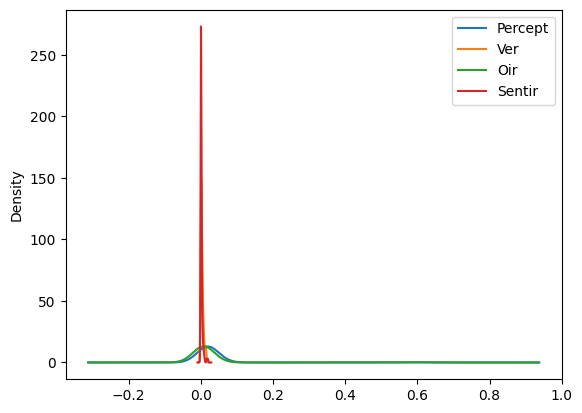

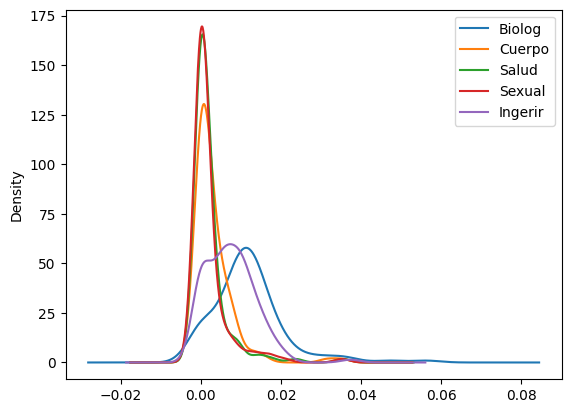

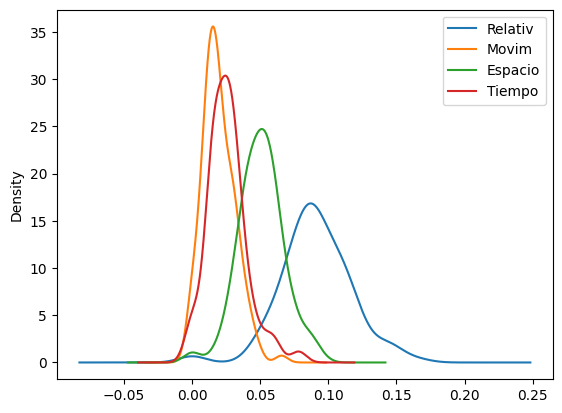

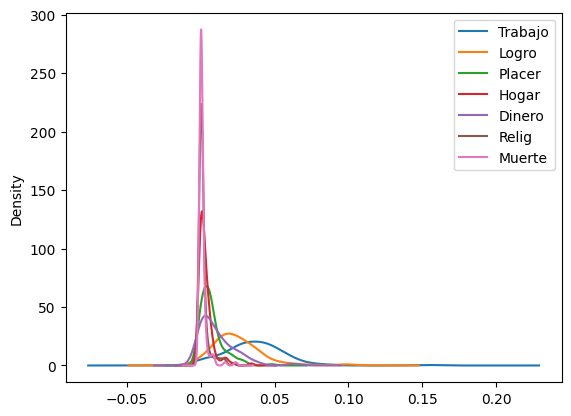

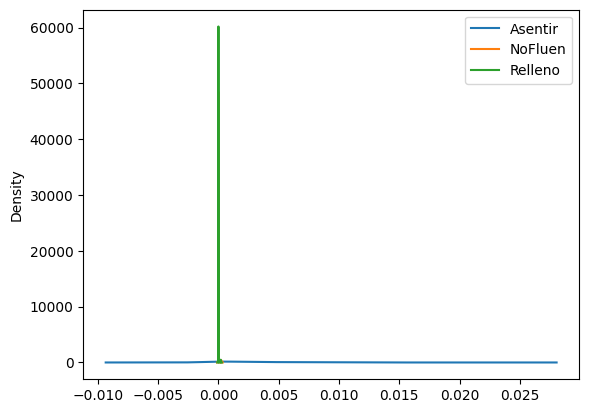

In [100]:
for category_name in class_categories:
  classes = class_categories[category_name]

  desc_df[classes].plot(kind='kde')

## Correlations

In [107]:
# Check for NaN values in the DataFrame
nan_rows = embi_df[embi_df.isnull().any(axis=1)]

# Check for infinite values in the DataFrame
inf_rows = embi_df[~embi_df.isin([np.nan, np.inf, -np.inf]).all(1)]

# Combine rows with NaN and infinite values
problematic_rows = pd.concat([nan_rows, inf_rows]).drop_duplicates()

# Print the problematic rows
print(problematic_rows)


          EMBI        date
1846       NaN    2018-1-1
1854       NaN   2018-1-11
1856       NaN   2018-1-15
1881       NaN   2018-2-19
1910       NaN   2018-3-30
...        ...         ...
3145  0.455044  2022-12-23
3147  0.452887  2022-12-27
3148  0.450937  2022-12-28
3149  0.452322  2022-12-29
3150  0.460635  2022-12-30

[1126 rows x 2 columns]


In [104]:
for key in merged_df:
  if key != 'date':
    x = merged_df[key].astype(float)
    y = merged_df['embi'].astype(float)
    corr = scipy.stats.pearsonr(x,y)
    print(key)
    print(corr)
    print()

ValueError: array must not contain infs or NaNs

In [102]:
# df_daily_corr['stat'] = None
# df_daily_corr['pvalue'] = None
corr_dict = {
'values': [],
'stats': [],
'pvalues': []
}
for key in merged_df:
  if key != 'date':
    x = merged_df[key].astype(float)
    y = merged_df['embi'].astype(float)
    stat, pvalue = scipy.stats.pearsonr(x,y)

    corr_dict['values'].append(key)
    corr_dict['stats'].append(stat)
    corr_dict['pvalues'].append(pvalue)
print(corr_dict)
df_daily_corr = pd.DataFrame(corr_dict)


display(df_daily_corr)

ValueError: array must not contain infs or NaNs

## Moving Window